# Fig 3a |  H&E image of the mouse embryo and four major regions

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1974


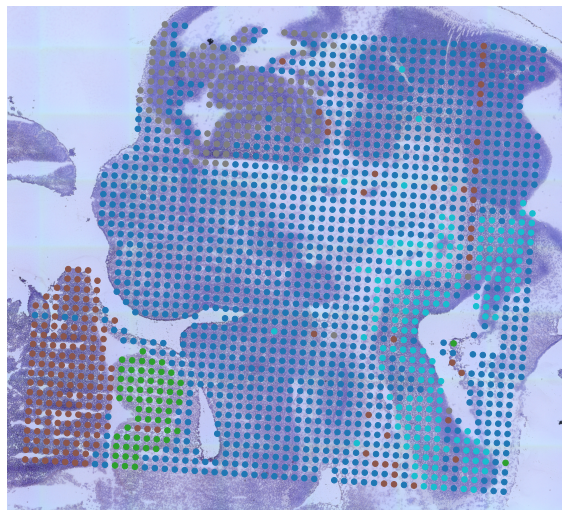

In [4]:
proj_name = 'Peak_60_SR'
label = pd.read_csv(f'result/{proj_name}/region_label_1.csv', index_col=0)

position = pd.read_csv(f'result/{proj_name}/filtered_position_4.csv')
barcode_ = []
for b in position['barcode']:
    barcode_.append(f'{b}-1')
label_filt = label.loc[barcode_]
label_ = []
for l in label_filt['clusters']:
    if int(l[1:]) == 1:
        label_.append(1)
    elif int(l[1:]) == 2:
        label_.append(2)
    elif int(l[1:]) == 8:
        label_.append(3)
    elif int(l[1:]) == 11:
        label_.append(4)
    else:
        label_.append(0)

all_row = position['imagerow'].tolist()
all_col = position['imagecol'].tolist()
all_pos = [[all_row[i], all_col[i]] for i in range(len(all_row))]

cm2 = plt.cm.get_cmap('tab10')

scale = 0.3
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

img = mpimg.imread(f'../DataPreprocess/data/atac_analyse_3/ME11_HE_20X_x{scale}.jpg')
ax.imshow(img)

xmin, xmax = (np.min(all_col) - 400)*scale, (np.max(all_col) + 400)*scale
ymin, ymax = (np.min(all_row) - 400)*scale, (np.max(all_row) + 400)*scale
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# 生成散点图数据
x = np.array(all_col) * scale
y = np.array(all_row) * scale

print(len(label_))
ax.scatter(x, y,s=30, c=label_, cmap=cm2)
ax.invert_yaxis()
ax.axis("off")
plt.tight_layout()
plt.savefig(f'../paper/NNfig/Fig3/a3.pdf')
plt.show()

# Fig 3b | Evaluation of resolution enhancement performance

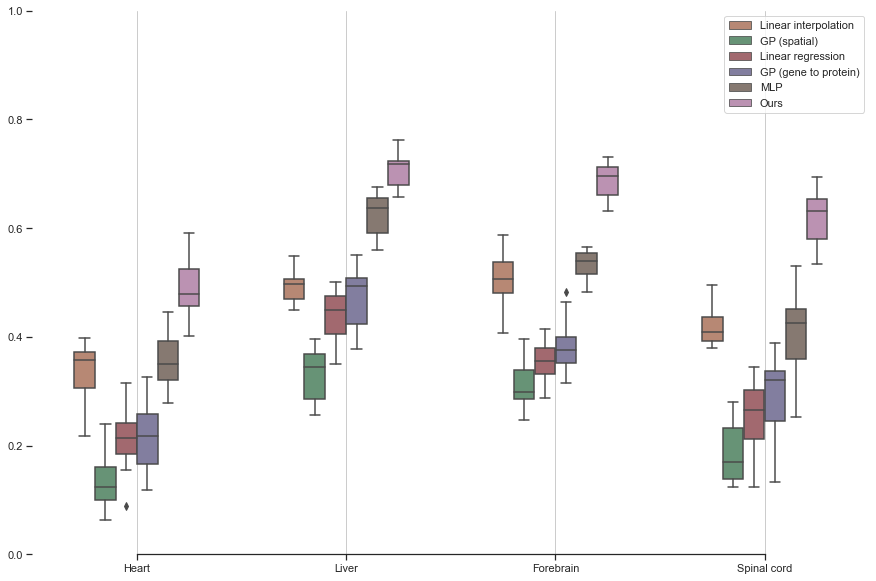

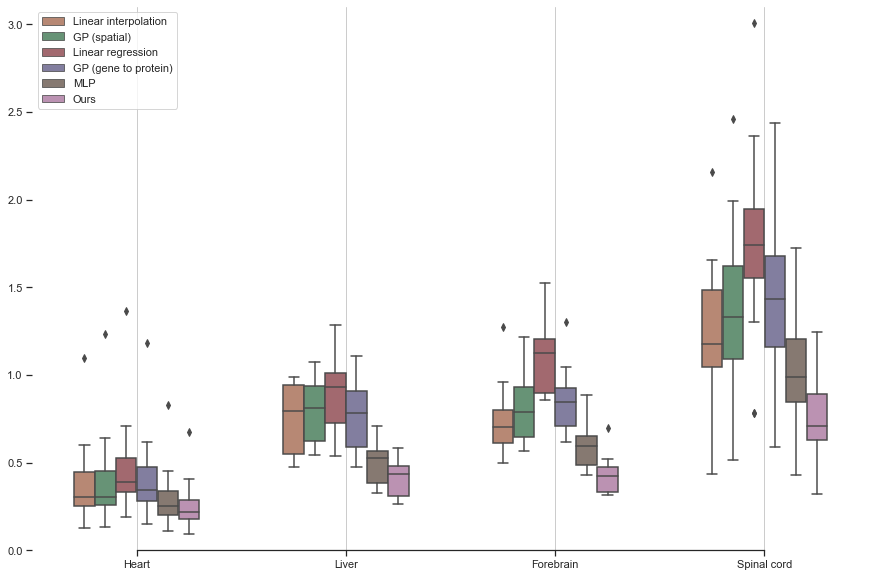

In [6]:
project_name = 'Peak_60'
exp_name = 'svae_peak_merge_nn1_n'

pro_name = pd.read_csv(f'result/{project_name}/marker_peaks.csv')['name'].tolist()
folder_name = f'result/{project_name}/{exp_name}'
fea = np.load(f'{folder_name}/infer_subspot.npy')
grid = 4
spot_num = 444
mean_fea = np.zeros((spot_num, fea.shape[1]))
for i in range(spot_num):
    sub_fea = fea[i*grid:(i+1)*grid, :]
    mean_fea[i] = np.mean(sub_fea, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_count.npy', fea)

df = pd.DataFrame(fea, columns=pro_name)
df.to_csv(f'result/{project_name}/{exp_name}_count.csv', index=None)

np.save(f'result/{project_name}/{exp_name}_mean.npy', mean_fea)
pd.DataFrame(mean_fea, columns=pro_name).to_csv(f'result/{project_name}/{exp_name}_mean.csv', index=None)

true_feature = pd.read_csv(f'result/{project_name}/reordered_filtered_peak.csv')
# ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')
ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

position = pd.read_csv(f'result/{project_name}/reordered_position_with_center.csv')
row = position['row'].tolist()
col = position['col'].tolist()

genes = ours.keys().tolist()

import pandas as pd

project_name = 'Peak_60'
exp_name = 'svae_peak_merge_nn1_n'

data = pd.read_csv(f'result/{project_name}/reordered_filtered_peak.csv')

data_spatial_2 = pd.read_csv(f'result/{project_name }/interpolation_linear_sample.csv')
data_spatial_3 = pd.read_csv(f'result/{project_name }/gp_sample.csv')

data_cross_1 = pd.read_csv(f'result/{project_name }/g2p_linear_sample.csv')
data_cross_2 = pd.read_csv(f'result/{project_name }/g2p_gaussian_process_sample.csv')
data_cross_3 = pd.read_csv(f'result/{project_name }/g2p_mlp_sample.csv')
data_cross_3 = pd.read_csv(f'result/{project_name }/g2p_mlp_32.csv')

data_ours = pd.read_csv(f'result/{project_name }/{exp_name}_count.csv')

data_control = pd.read_csv(f'result/{project_name}/count_merge.csv')
position = pd.read_csv(f'result/{project_name }/reordered_position_with_center.csv')


row = np.array(position['row'].tolist())
col = np.array(position['col'].tolist())

r_position = pd.read_csv(f'result/{project_name }/colData_merge.csv')

row_r = r_position['row']*2
col_r = r_position['col']*2+1

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from scipy.stats import pearsonr, spearmanr, ttest_rel
from scipy.stats import wasserstein_distance as WD
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


width = 5 / 2 * np.mean(row)
height = 5 / 2 * np.mean(col)
pearson_ours_list = []

pearson_spatial_2_list = []
pearson_spatial_3_list = []

pearson_cross_1_list = []
pearson_cross_2_list = []
pearson_cross_3_list = []

mse_ours_list = []
mse_spatial_2_list = []
mse_spatial_3_list = []
mse_cross_1_list = []
mse_cross_2_list = []
mse_cross_3_list = []


for i in range(len(genes)):
    gene = genes[i]

    exp_gt = data[gene]
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]
    
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]

    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]
    

    # pearson
    pearson_ours, _ = pearsonr(exp_gt, exp_ours)
    pearson_spatial_2, _ = pearsonr(exp_gt, exp_spatial_2)
    pearson_spatial_3, _ = pearsonr(exp_gt, exp_spatial_3)

    pearson_cross_1, _ = pearsonr(exp_gt, exp_cross_1)
    pearson_cross_2, _ = pearsonr(exp_gt, exp_cross_2)
    pearson_cross_3, _ = pearsonr(exp_gt, exp_cross_3)

    pearson_ours_list.append(pearson_ours)
    pearson_spatial_2_list.append(pearson_spatial_2)
    pearson_spatial_3_list.append(pearson_spatial_3)
    pearson_cross_1_list.append(pearson_cross_1)
    pearson_cross_2_list.append(pearson_cross_2)
    pearson_cross_3_list.append(pearson_cross_3)

    # mse
    mse_ours = mean_squared_error(exp_gt, exp_ours)
    mse_s_2 = mean_squared_error(exp_gt, exp_spatial_2)
    mse_s_3 = mean_squared_error(exp_gt, exp_spatial_3)
    mse_c_1 = mean_squared_error(exp_gt, exp_cross_1)
    mse_c_2 = mean_squared_error(exp_gt, exp_cross_2)
    mse_c_3 = mean_squared_error(exp_gt, exp_cross_3)

    mse_ours_list.append(mse_ours)
    mse_spatial_2_list.append(mse_s_2)
    mse_spatial_3_list.append(mse_s_3)
    mse_cross_1_list.append(mse_c_1)
    mse_cross_2_list.append(mse_c_2)
    mse_cross_3_list.append(mse_c_3)


df_pearson = {
    'method': 
    ['Linear interpolation'] * len(pearson_spatial_2_list)
    + ['GP (spatial)'] * len(pearson_spatial_3_list)
    + ['Linear regression'] * len(pearson_cross_1_list)
    + ['GP (gene to protein)'] * len(pearson_cross_2_list)
    + ['MLP'] * len(pearson_cross_3_list)
    + ['Ours'] * len(pearson_ours_list),
    'value': pearson_spatial_2_list + pearson_spatial_3_list
    + pearson_cross_1_list + pearson_cross_2_list + pearson_cross_3_list + pearson_ours_list,
}


df_mse = {
    'method': 
    ['Linear interpolation'] * len(mse_spatial_2_list)
    + ['GP (spatial)'] * len(mse_spatial_3_list)
    + ['Linear regression'] * len(mse_cross_1_list)
    + ['GP (gene to protein)'] * len(mse_cross_2_list)
    + ['MLP'] * len(mse_cross_3_list)
    + ['Ours'] * len(mse_ours_list),
    'value': mse_spatial_2_list + mse_spatial_3_list
    + mse_cross_1_list + mse_cross_2_list + mse_cross_3_list +  mse_ours_list,
}

color_list = [[194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [138, 120, 109],
             [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]
df_pearson_region = {
    'method': 
    ['Linear interpolation'] * len(pearson_spatial_2_list)
    + ['GP (spatial)'] * len(pearson_spatial_3_list)
    + ['Linear regression'] * len(pearson_cross_1_list)
    + ['GP (gene to protein)'] * len(pearson_cross_2_list)
    + ['MLP'] * len(pearson_cross_3_list)
    + ['Ours'] * len(pearson_ours_list),
    'value':pearson_spatial_2_list + pearson_spatial_3_list
    + pearson_cross_1_list + pearson_cross_2_list + pearson_cross_3_list
    + pearson_ours_list,
    'region':(['Heart']*15 + ['Liver']*15 + ['Forebrain']*15 + ['Spinal cord']*15)*6,
}

df_mse_region = {
    'method': 
    ['Linear interpolation'] * len(mse_spatial_2_list)
    + ['GP (spatial)'] * len(mse_spatial_3_list)
    + ['Linear regression'] * len(mse_cross_1_list)
    + ['GP (gene to protein)'] * len(mse_cross_2_list)
    + ['MLP'] * len(mse_cross_3_list)
    + ['Ours'] * len(mse_ours_list),
    'value': mse_spatial_2_list + mse_spatial_3_list
    + mse_cross_1_list + mse_cross_2_list + mse_cross_3_list + mse_ours_list,
    'region':(['Heart']*15 + ['Liver']*15 + ['Forebrain']*15 + ['Spinal cord']*15)*6,
}

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="region", y="value", data=df_pearson_region,
            width=.6, hue="method", palette=color_x)
# sns.stripplot(x="region", y="value", data=df_pearson_region,
#               size=4, color=".3", linewidth=0, hue="method")
# Tweak the visual presentation
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig3/pearson_region.pdf')
plt.show()

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="region", y="value", data=df_mse_region,
            width=.6, palette=color_x, hue="method")
# sns.stripplot(x="region", y="value", data=df_pearson_region,
#               size=4, color=".3", linewidth=0, hue="method")
# Tweak the visual presentation
ax.set(ylim=(0, 3.1))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig3/mse_region.pdf')
plt.show()


# Fig3c | Spatial visualization of peak counts from four organs using original profiles and enhanced profiles by soScope

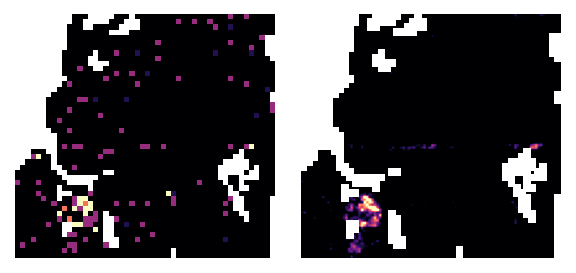

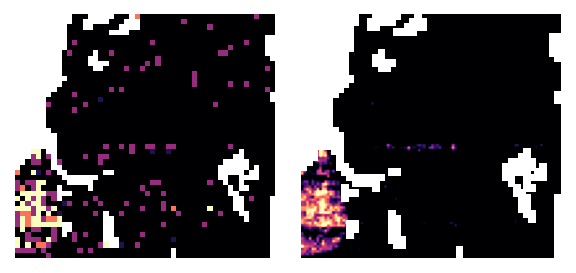

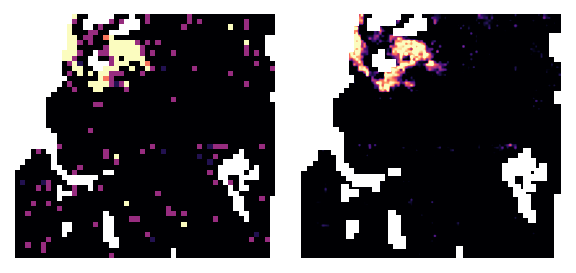

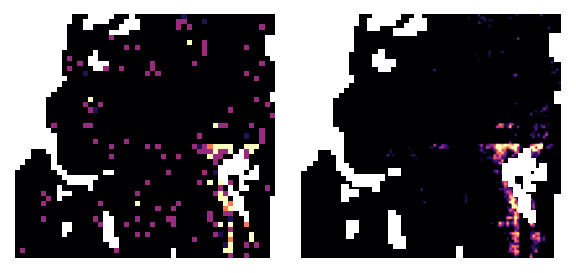

In [7]:
project_name = 'Peak_60_SR'
exp_name = 'svae_peak_nn1_n'
data = pd.read_csv(f'result/{project_name}/reordered_marker_peak.csv', index_col=0)

data_spatial_1 = pd.read_csv(f'result/{project_name}/interpolation_linear_sample.csv')
data_spatial_2 = pd.read_csv(f'result/{project_name}/gp_sample.csv')

data_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear_sample.csv')
data_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gaussian_process_sample.csv')
data_cross_3 = pd.read_csv(f'result/{project_name}/g2p_mlp_sample.csv')

# data_ours = pd.read_csv(f'result/{project_name}/svae_peak_g17_n_count.csv')
data_ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')

data_list = [data_spatial_1, data_spatial_2 , data_cross_1, data_cross_2, data_cross_3, data_ours]

data_name = ['interpolation_linear', 'gp', 'g2p_lrm', 'g2p_gp', 'g2p_mlp', 'ours']
data_list = [data_spatial_1, data_spatial_2 , data_cross_1, data_cross_2, data_cross_3, data_ours]

position = pd.read_csv(f'result/{project_name}/filtered_position_4.csv')
row = position['row']
col = position['col']


en_position = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')
en_row = en_position['row']
en_col = en_position['col']

count = 0
genes_roi = [2, 22, 44, 52]


for i in range(4):
    fig = plt.figure(figsize=(4, 8), dpi=150)
    x_ = data.iloc[:, genes_roi[i]].values.reshape(-1, 1)
        
    label_j = [int(x_[i] > np.mean(x_)) for i in range(len(x_))]
    count += 1
    ax = fig.add_subplot(1, 2, 1)
    mat = np.full([np.max(row)+1,np.max(col)+1], np.nan)
    for k in range(len(col)):
        mat[row[k], -1-col[k]] = x_[k]
    im = ax.imshow(mat, cmap='magma', vmin=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    
    x_ = data_list[-1].iloc[:, genes_roi[i]].values.reshape(-1, 1)
    count += 1
    ax = fig.add_subplot(1, 2, 2)
    mat = np.full([np.max(en_row)+1,np.max(en_col)+1], np.nan)
    for k in range(len(en_col)):
        mat[en_row[k], -1-en_col[k]] = x_[k]
    im = ax.imshow(mat, cmap='magma', vmin=0.5, vmax=4)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'../paper/NNfig/Fig3/enhance.pdf')        
plt.show()

# Fig 3d | Count heatmap of all analyzed peaks from original profiles (top) and enhanced profiles

In [8]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd


project_name = 'Peak_60'

In [9]:
true_feature = pd.read_csv(f'result/{project_name}/reordered_filtered_peak.csv')

In [10]:
genes = ours.keys().tolist()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

position = pd.read_csv(f'result/{project_name}/reordered_position_with_center.csv')
row = position['row'].tolist()
col = position['col'].tolist()

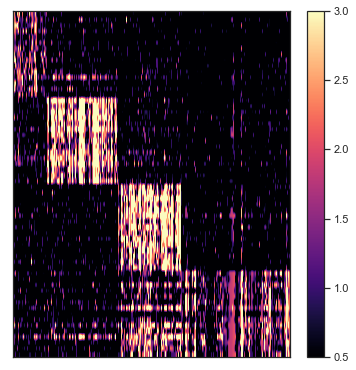

In [12]:
en_label = pd.read_csv(f'result/{project_name}/smth_label_filt.csv')
label = [5]*len(en_label)
c1 = en_label['C1'].tolist()
c2 = en_label['C2'].tolist()
c8 = en_label['C8'].tolist()
c11 = en_label['C11'].tolist()

for i in range(len(en_label)):
    if c1[i] == 1:
        label[i] = 1
    elif c2[i] == 1:
        label[i] = 2
    elif c8[i] == 1:
        label[i] = 3
    elif c11[i] == 1:
        label[i] = 4
        
label_merge = []
for i in range(len(label)):
    if i % 4 == 3:
        label_merge.append(label[i])
        
true_feature_ = true_feature.copy()
true_feature_['label'] = label
true_feature_sorted = true_feature_.sort_values(by='label')

import numpy as np
import matplotlib.pyplot as plt

true_feature_sorted_ = true_feature_sorted.loc[true_feature_sorted['label']<5, :]
arr = true_feature_sorted_[genes].values

def max_min_norm(array):
    return (array-np.min(array))/(np.max(array)-np.min(array))


import numpy as np
import matplotlib.pyplot as plt

cmp = 'magma'
# 设置图像尺寸
fig = plt.figure(figsize=(8, 8))

vmin = 0.5
vmax = 3

# 绘制热力图
ax = fig.add_subplot(111)
arr_t = arr.T

# arr_t_m = max_min_norm(arr_t)

im = ax.imshow(arr_t, cmap=cmp , aspect='auto', vmin=vmin, vmax=vmax)

# 设置纵轴标签
yticks = np.arange(arr_t.shape[0])
yticklabels = genes

ax.set_xticks([])
ax.set_yticks([])

# # 添加colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# # 调整子图间距
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, wspace=0.4, hspace=0.4)

# 显示图像
plt.savefig(f'../paper/NNfig/Fig3/de_lr.pdf')
plt.show()

In [13]:
project_name = 'Peak_60_SR'
# exp_name = 'svae_peak_fin1_n'
exp_name = 'svae_peak_nn1_n'
pro_name = pd.read_csv(f'result/Peak_60_SR/marker_peaks.csv')['name'].tolist()
folder_name = f'result/{project_name}/{exp_name}'
fea = np.load(f'{folder_name}/infer_subspot.npy')
grid = 4
spot_num = fea.shape[0]//grid
mean_fea = np.zeros((spot_num, fea.shape[1]))
for i in range(spot_num):
    sub_fea = fea[i*grid:(i+1)*grid, :]
    mean_fea[i] = np.mean(sub_fea, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_count.npy', fea)

df = pd.DataFrame(fea, columns=pro_name)
df.to_csv(f'result/{project_name}/{exp_name}_count.csv', index=None)

np.save(f'result/{project_name}/{exp_name}_mean.npy', mean_fea)
pd.DataFrame(mean_fea, columns=pro_name).to_csv(f'result/{project_name}/{exp_name}_mean.csv', index=None)

In [14]:
# batch_num = 17
# en_ours = pd.read_csv(f'result/Peak_60_SR/svae_peak_g{batch_num}_n_count.csv')

en_ours = pd.read_csv(f'result/Peak_60_SR/{exp_name}_count.csv')
en_position = pd.read_csv(f'result/Peak_60_SR/position_enhance_with_center.csv')
en_row = en_position['row'].tolist()
en_col = en_position['col'].tolist()
enhanced_label = pd.read_csv(f'result/Peak_60_SR/en_smth_label.csv', index_col=0)

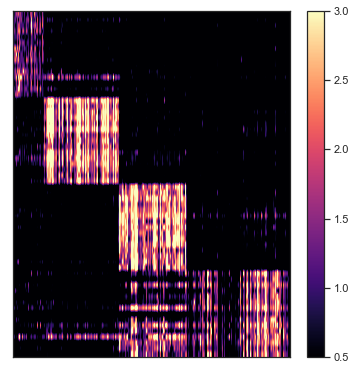

In [15]:
label = [5]*len(enhanced_label)
c1 = enhanced_label['C1'].tolist()
c2 = enhanced_label['C2'].tolist()
c8 = enhanced_label['C8'].tolist()
c11 = enhanced_label['C11'].tolist()

for i in range(len(label)):
    if c1[i] == 1:
        label[i] = 1
    elif c2[i] == 1:
        label[i] = 2
    elif c8[i] == 1:
        label[i] = 3
    elif c11[i] == 1:
        label[i] = 4
        
en_ours_ = en_ours.copy()
en_ours_['label'] = label
en_ours_sorted = en_ours_.sort_values(by='label')

# 创建示例数组
en_ours_sorted_ = en_ours_sorted.loc[en_ours_sorted['label']<5, :]

vmin = 0.5
vmax = 3

arr_en_ours = en_ours_sorted_[genes].values

# arr_ours_m = max_min_norm(arr_ours)
# 绘制热力图
# 设置图像尺寸
fig = plt.figure(figsize=(8, 8))

# 绘制热力图
ax = fig.add_subplot(111)
im = ax.imshow(arr_en_ours.T, cmap=cmp, aspect='auto', vmin=vmin, vmax=vmax)
ax.set_xticks([])
ax.set_yticks([])


# # 添加colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# # 调整子图间距
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, wspace=0.4, hspace=0.4)
# plt.savefig(f'../paper/NNfig/Fig3/de_sr_{exp_name}.pdf')
# 显示图像
plt.show()

# Supp Fig 4a | Spatial visualization of representative enriched peaks before and after enhancement from different tissue regions

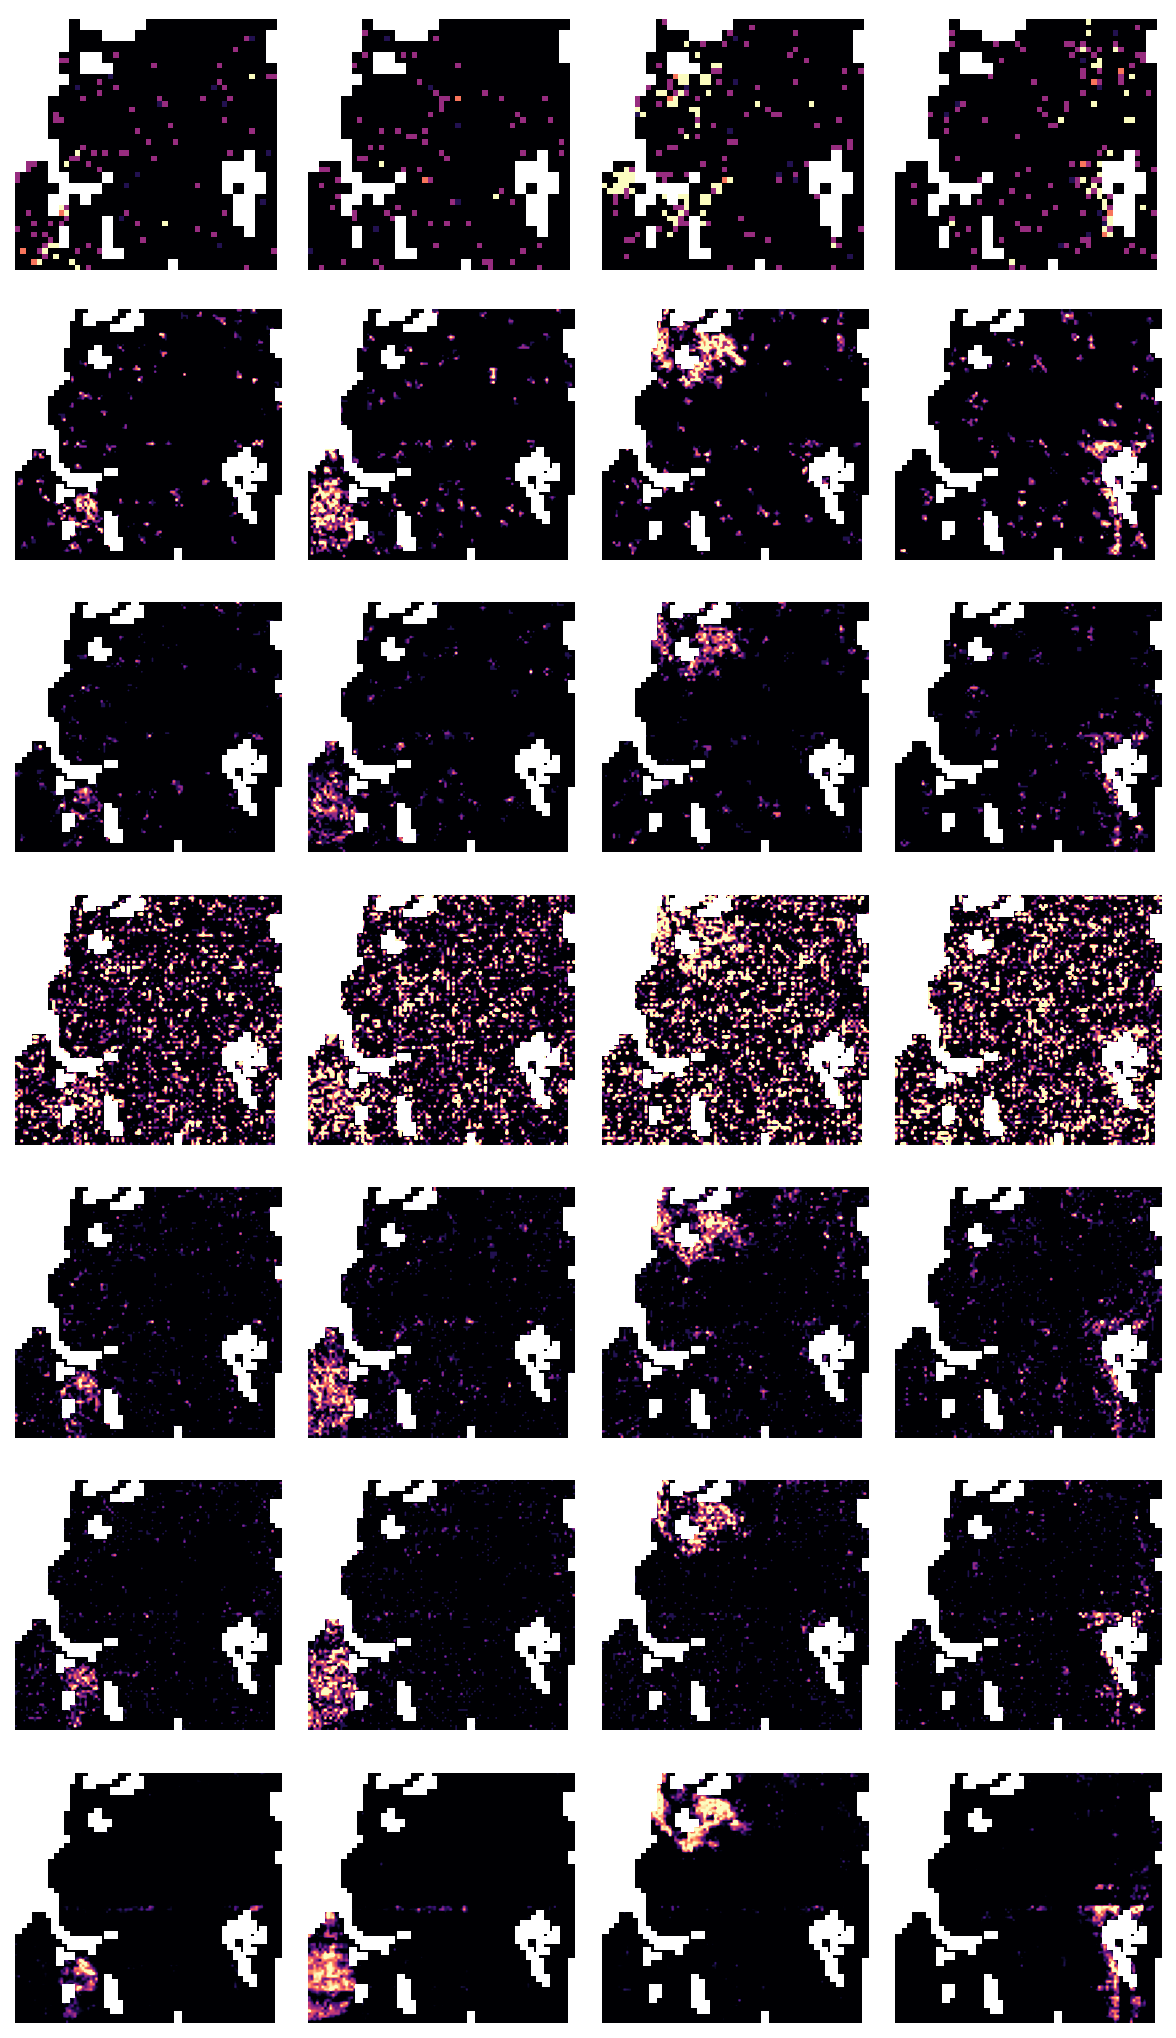

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import cdist
from scipy import stats
import os
os.environ["OMP_NUM_THREADS"] = '1'

methods_name = ['gt'] + data_name
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cmp='magma'
fig = plt.figure(figsize=(8, 14), dpi=150)
for i in range(4):
    x_ = data.iloc[:, genes_roi[i]].values.reshape(-1, 1)
    ax = fig.add_subplot(7, 4, i+1)
    mat = np.full([np.max(row)+1,np.max(col)+1], np.nan)
    for k in range(len(col)):
        mat[row[k], -1-col[k]] = x_[k]
    im = ax.imshow(mat, cmap=cmp, vmin=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    
    for j in range(6):
        x_ = data_list[j].iloc[:, genes_roi[i]].values.reshape(-1, 1)
        ax = fig.add_subplot(7, 4, 4*j+i+5)
        mat = np.full([np.max(en_row)+1,np.max(en_col)+1], np.nan)
        for k in range(len(en_col)):
            mat[en_row[k], -1-en_col[k]] = x_[k]
        im = ax.imshow(mat, cmap=cmp, vmin=0.5, vmax=4)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.axis('off')
        plt.tight_layout()
plt.savefig(f'../paper/NNfig/Fig3/supp/exp_sr_vmax_2.png')        
plt.show()

# Supp Fig 4b | Characterization of high and low expression regions by clustering profiles into two groups using k-means

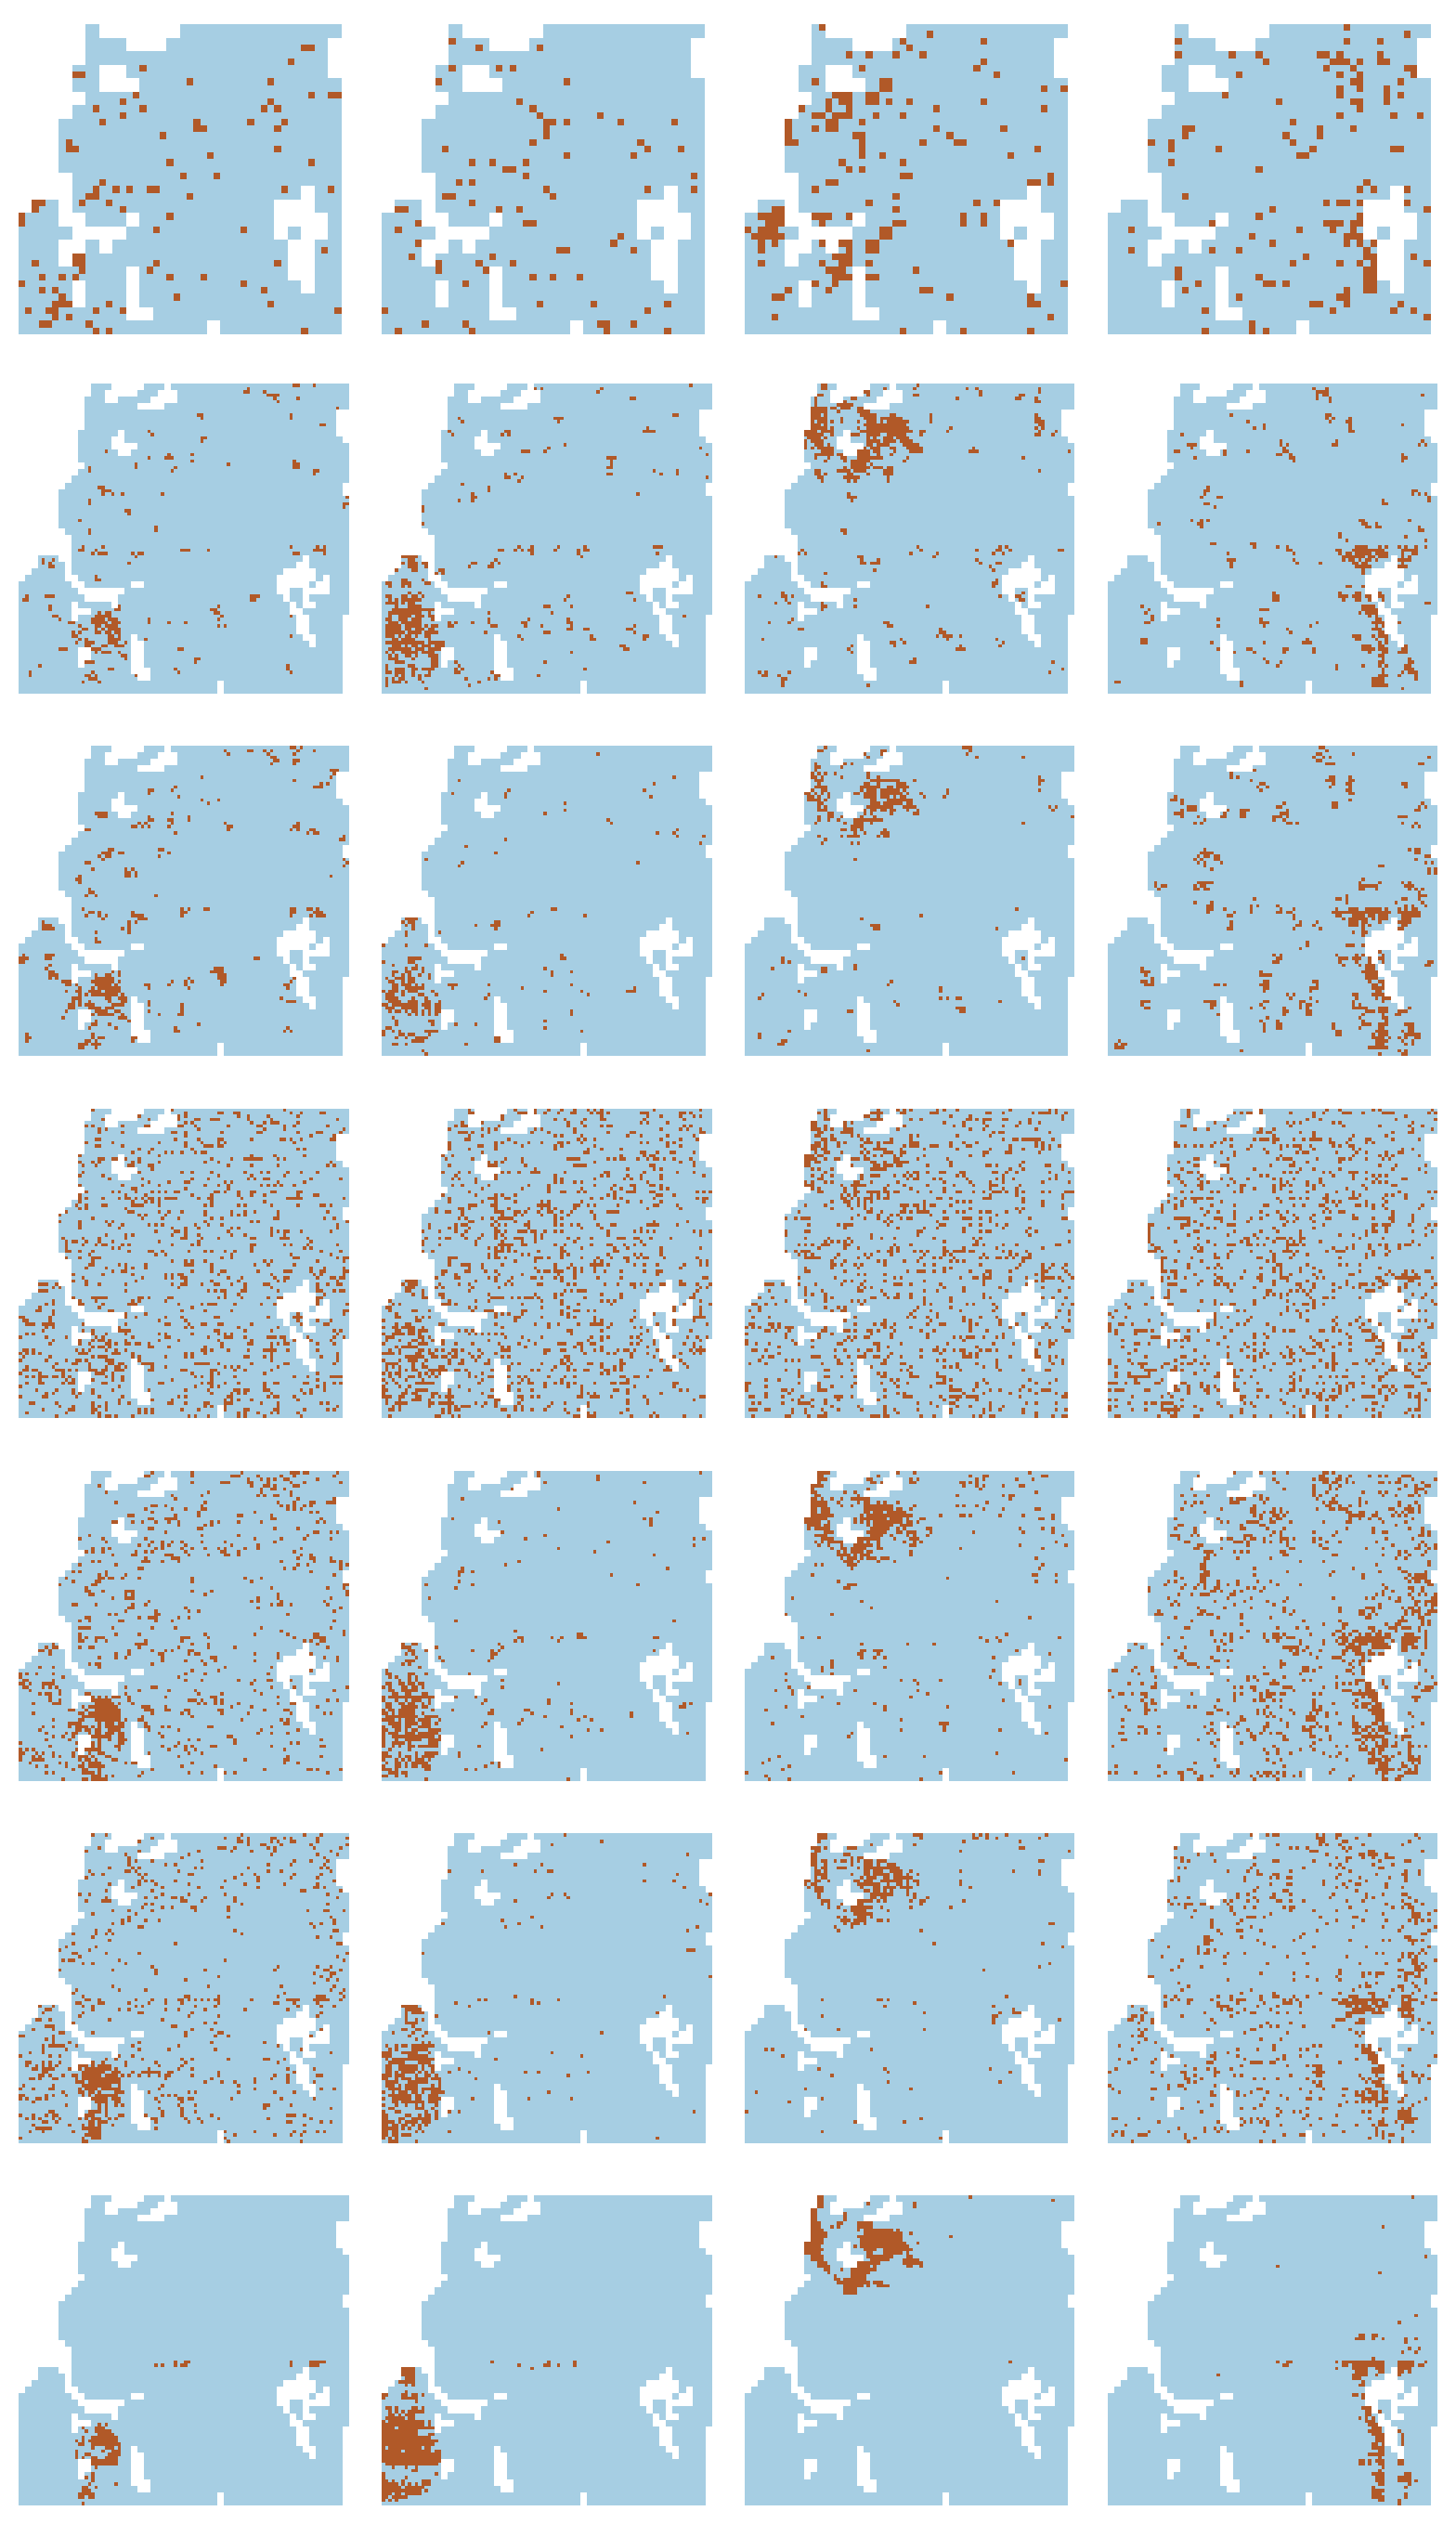

In [18]:
methods_name = ['gt'] + data_name
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

count = 0
genes_roi = [2, 22, 44, 52]


fig = plt.figure(figsize=(8, 14), dpi=200)
for i in range(4):
    x_ = data.iloc[:, genes_roi[i]].values.reshape(-1, 1)
    label_j = kmeans.fit(x_).labels_
    if np.mean(label_j) >= 0.5:
        label_j = 1 - label_j
        
    label_j = [int(x_[i] > np.mean(x_)) for i in range(len(x_))]
    count += 1
    ax = fig.add_subplot(7, 4, i+1)
    mat = np.full([np.max(row)+1,np.max(col)+1], np.nan)
    for k in range(len(col)):
        mat[row[k], -1-col[k]] = label_j[k]
    im = ax.imshow(mat, cmap='Paired')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    
    for j in range(6):
        x_ = data_list[j].iloc[:, genes_roi[i]].values.reshape(-1, 1)
        label_j = kmeans.fit(x_).labels_
        if np.mean(label_j) >= 0.5:
            label_j = 1 - label_j
        # label_j = [int(x_[i] > 4 * np.mean(x_)) for i in range(len(x_))]    
        count += 1
        ax = fig.add_subplot(7, 4, 4*j+i+5)
        mat = np.full([np.max(en_row)+1,np.max(en_col)+1], np.nan)
        for k in range(len(en_col)):
            mat[en_row[k], -1-en_col[k]] = label_j[k]
        im = ax.imshow(mat, cmap='Paired')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.axis('off')
        plt.tight_layout()
plt.savefig(f'../paper/NNfig/Fig3/supp/cluster_sr_2.png')        
plt.show()

# Supp Fig 4c | Evaluation of spatial compactness for high expression regions using the spatial distance between highly expressed spots

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import cdist
from scipy import stats
import os
os.environ["OMP_NUM_THREADS"] = '1'

project_name = 'Peak_60_SR'
exp_name = 'svae_peak_nn1_n'
data = pd.read_csv(f'result/{project_name}/reordered_marker_peak.csv', index_col=0)

data_spatial_1 = pd.read_csv(f'result/{project_name}/interpolation_linear_sample.csv')
data_spatial_2 = pd.read_csv(f'result/{project_name}/gp_sample.csv')

data_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear_sample.csv')
data_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gaussian_process_sample.csv')
data_cross_3 = pd.read_csv(f'result/{project_name}/g2p_mlp_sample.csv')

data_ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')

position = pd.read_csv(f'result/{project_name}/filtered_position_4.csv')
row = position['row']
col = position['col']


en_position = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')
en_row = en_position['row']
en_col = en_position['col']

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data_name = ['interpolation_linear', 'gp', 'g2p_lrm', 'g2p_gp', 'g2p_mlp', 'ours']
data_list = [data_spatial_1, data_spatial_2 , data_cross_1, data_cross_2, data_cross_3, data_ours]

def get_distance_distribution(row, col, label_ours, top_rank=5):
    points_ours = []
    for i in range(len(row)):
        if label_ours[i]==1:
            points_ours.append([row[i], col[i]])

    d_ours = cdist(points_ours, points_ours)
    sorted_d_ours = np.sort(d_ours, axis=1)
    avg_d_ours = np.mean(sorted_d_ours[:, 1:1+top_rank], axis=1)
    ours_label = avg_d_ours.tolist()
    return ours_label
    
label = []
value = []
method = []

methods_name = ['gt'] + data_name

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import cdist
from scipy import stats

import pandas as pd
from scipy import stats
import seaborn as sns

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

def get_distance_distribution(row, col, label_ours, top_rank=5):
    points_ours = []
    for i in range(len(row)):
        if label_ours[i]==1:
            points_ours.append([row[i], col[i]])

    d_ours = cdist(points_ours, points_ours)
    sorted_d_ours = np.sort(d_ours, axis=1)
    avg_d_ours = np.mean(sorted_d_ours[:, 1:1+top_rank], axis=1)
    ours_label = avg_d_ours.tolist()
    return ours_label
    
label = []
value = []
method = []

methods_name = ['gt'] + data_name

color_list2 = [[91, 117, 157], 
              [194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [138, 120, 109],
             [194, 139, 182]]
color_x2 = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list2]


for i in range(60):
     # for groundtruth 
    label_j = kmeans.fit(data.iloc[:, i].values.reshape(-1, 1)).labels_
    if np.mean(label_j) >= 0.5:
        label_j = 1 - label_j
    j_dis = get_distance_distribution(row, col, label_j)
    label += [int(i//15)]
    method += [methods_name[0]]
    value += [np.median(j_dis)]
    for j in range(6):
        label_j = kmeans.fit(data_list[j].iloc[:, i].values.reshape(-1, 1)).labels_
        if np.mean(label_j) >= 0.5:
            label_j = 1 - label_j
        j_dis = get_distance_distribution(en_row, en_col, label_j)
        label += [int(i//15)]
        method += [methods_name[j+1]]
        value += [np.median(j_dis)]



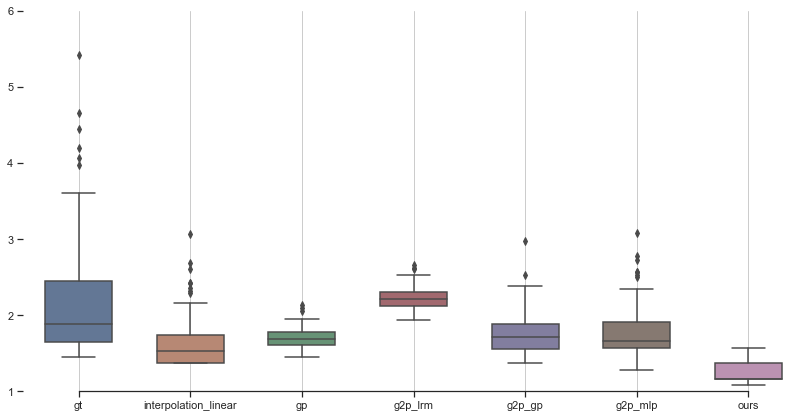

In [49]:
df_peak = {
    'label': label,
    'value': value,
    'method': method
}

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x="method", y="value", data=df_peak,  palette=color_x2,
            width=.6)
# Tweak the visual presentation
ax.set(ylim=(1, 6.0))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig3/supp/distance_Sr.pdf')
plt.show()

# Fig 3e | Detailed investigation of the embryo heart region

In [357]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd


project_name = 'Heart_x3ud2'
# exp_name = 'Heart_Fin_22'
exp_name = 'Heart_Fin_23'
# exp_name = 'svae_heart_nn1_n'
true_feature = pd.read_csv(f'result/{project_name}/heart_peak.csv', index_col=0)
pro_name = pd.read_csv(f'result/{project_name}/heart_peak_name.csv', index_col=0)
gene_index = true_feature.keys().tolist()

folder_name = f'result/{project_name}/{exp_name}'
fea = np.load(f'{folder_name}/infer_subspot.npy')

df = pd.DataFrame(fea, columns=gene_index)
df.to_csv(f'result/{project_name}/{exp_name}_count.csv', index=None)


<Figure size 1200x400 with 0 Axes>

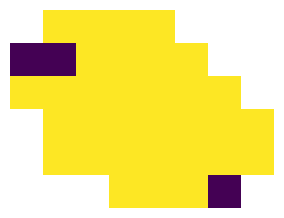

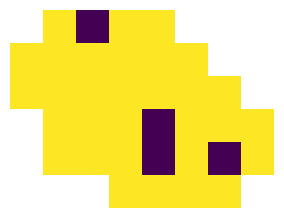

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

position_heart = pd.read_csv(f'result/{project_name}/heart_position_with_label.csv')
row_heart_ = (position_heart['row'] - np.min(position_heart['row']) + 1).tolist()
col_heart_ = (position_heart['col'] - np.min(position_heart['col']) + 1).tolist()

row_heart = position_heart['row'].tolist()
col_heart = position_heart['col'].tolist()
fig = plt.figure(figsize=(12, 4), dpi=100)
i = 0
gene = pro_name['Gene'].tolist()
genes = true_feature.keys().tolist()

cmp = 'viridis'
for idx in [0, 4]:
    i += 1
    fig = plt.figure(figsize=(3, 3), dpi=100)
    ax = fig.add_subplot()
    plt.axis('off')
    mat = np.full([np.max(row_heart_),np.max(col_heart_)], np.nan)
    g = genes[idx]
    q=1E6
    log_norm_true_fea = -1*np.log(q*(true_feature[g])/(np.sum(true_feature[g]))+1)
    for j in range(len(col_heart_)):
       mat[row_heart_[j]-1, -col_heart_[j]] = log_norm_true_fea[j]
    im = ax.imshow(mat, cmap=cmp)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'../paper/NNfig/Fig3/{gene[idx]}.pdf')
    plt.show()

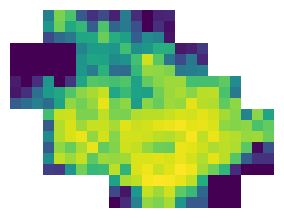

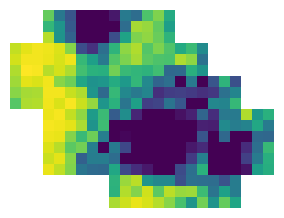

In [366]:
en_position = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')
en_row_heart_ = (en_position['row'] - np.min(en_position['row']) + 1).tolist()
en_col_heart_ = (en_position['col'] - np.min(en_position['col']) + 1).tolist()


ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')
genes = ours.keys().tolist()

cmp = 'viridis'
i = 0
gene = pro_name['Gene'].tolist()
genes = true_feature.keys().tolist()

t_ = [0.5,0.6]
# t_ = [1,1]
for idx in [0, 4]:
    i += 1
    fig = plt.figure(figsize=(3, 3), dpi=100)
    ax = fig.add_subplot()
    plt.axis('off')
    mat = np.full([np.max(en_row_heart_),np.max(en_col_heart_)], np.nan)
    g = genes[idx]
    q=1E2
    log_norm_ours = -1*np.log(q*(ours[g] - np.min(ours[g]))/(np.max(ours[g]) - np.min(ours[g]))+1)
    # log_norm_ours = -1*np.log(q*(ours[g])/(np.sum(ours[g])+1))
    # log_norm_ours -= np.min(log_norm_ours)
    for j in range(len(en_col_heart_)):
        mat[en_row_heart_[j]-1, -en_col_heart_[j]] = log_norm_ours[j]
    im = ax.imshow(mat, cmap=cmp, vmin=t_[i-1]*np.min(log_norm_ours))
    # im = ax.imshow(mat, cmap=cmp)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'../paper/NNfig/Fig3/{gene[idx]}_sr_2.pdf')
    plt.show()

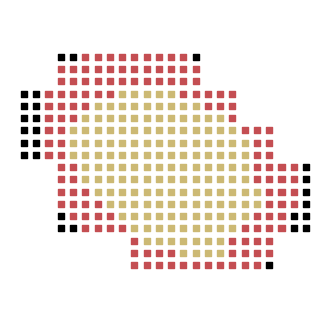

In [230]:
gt_label_df = pd.read_csv(f'result/{project_name}/en_label_layers.csv')
gt_label = gt_label_df['heart'].tolist()

import matplotlib as mpl
row_ = en_position['row']
col_ = en_position['col']
size = 20
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
norm = matplotlib.colors.Normalize(vmin=0, vmax=2)
plt.axis("equal")
plt.axis('off')
cmp = mpl.colors.ListedColormap(['black','r','y'])
plt.scatter(-col_, -row_, s=size,
            marker = 's',
#                 c=np.log(10*(ours[g] - np.min(ours[g]))/(np.max(ours[g]) - np.min(ours[g]))+1),
            c=gt_label,
            # c=ours[g]+edge*np.max(ours[g])/500,
            # norm=norm
            cmap=cmp
            )
plt.savefig(f'../paper/NNfig/Fig3/heart_label.pdf')
plt.show()

In [231]:
pro_name = pd.read_csv(f'result/{project_name}/heart_peak_name.csv', index_col=0)
gene = pro_name['Gene'].tolist()
gene

['Fhl2',
 'Myl2',
 'Ptn',
 'Ldha',
 'Ldha',
 'Aldh1a2',
 'Tbx18',
 'Mb',
 'Lgals1',
 'Myrf',
 'Tnni1',
 'Tnnt2',
 'Ybx1',
 'Sparc',
 'Sparc']

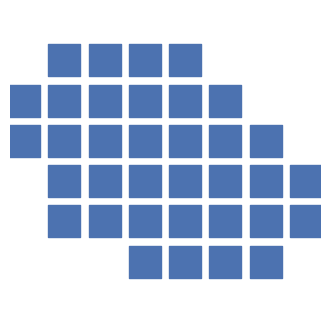

In [232]:
row_lr = [-row_[9*i] for i in range(int(1/9 * len(row_)))]
col_lr = [-col_[9*i] for i in range(int(1/9 * len(row_)))]
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
norm = matplotlib.colors.Normalize(vmin=0, vmax=3)
plt.axis("equal")
plt.axis('off')
cmp = mpl.colors.ListedColormap(['black','g','y'])
plt.scatter(col_lr, row_lr, s=500,
            marker = 's',
            cmap=cmp
            )
plt.savefig(f'../paper/NNfig/Fig3/sampling_spot.pdf')
plt.show()

547


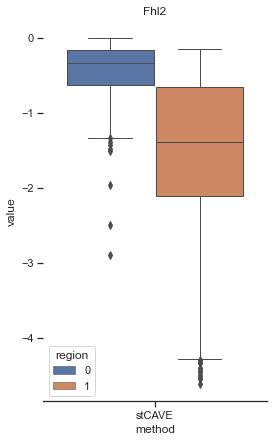

36058


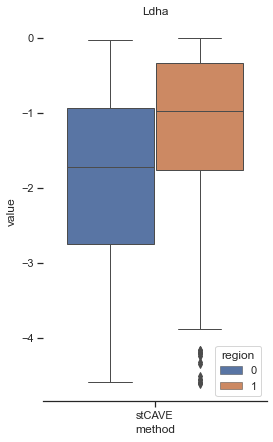

In [365]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

lr_expression = pd.read_csv(f'result/{project_name}/heart_peak.csv')
hr_expression = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')
gt_label_df = pd.read_csv(f'result/{project_name}/en_label_layers.csv')
gt_label = gt_label_df['heart'].tolist()
gt_label_ = [int(l < 2) for l in gt_label]
hr_expression['gt_label'] = gt_label_

i = 0

for idx in [0, 4]:
    g = genes[idx]
    i += 1
    print(g)
    log_norm = -1*np.log(q*(ours[g] - np.min(ours[g]))/(np.max(ours[g]) - np.min(ours[g]))+1)
    exp_0 = log_norm.tolist()
    df_exp = {
        'value':exp_0,
        'method': ['stCAVE'] * len(exp_0),
        'region': hr_expression['gt_label'],
    }
    df_exp = pd.DataFrame(df_exp)
    sns.set_theme(style="ticks")
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4, 7))
    plt.title(f'{gene[idx]}')
    sns.set_theme(style="whitegrid")

    # Draw a nested violinplot and split the violins for easier comparison
    # sns.boxplot(data=df_exp, x="method", y="value", hue="region",
    #             whis=[0, 100], linewidth=1)
    sns.boxplot(data=df_exp, x="method", y="value", hue="region",
            linewidth=1)
    sns.despine(left=True)
    plt.savefig(f'../paper/NNfig/Fig3/inner_outer_{gene[idx]}.pdf')
    plt.show()


In [367]:
from scipy import stats

def get_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    elif p_value < 0.1:
        return "."
    else:
        return "n.s."


g = genes[0]
# exp_0 = np.log(hr_expression[g]+1).tolist()
exp_0 = log_norm.tolist()
in_ = []
out_ = []
for i in range(len(hr_expression['gt_label'])):
    l = hr_expression['gt_label'][i]
    if l == 1:
        in_.append(exp_0[i])
    else:
        out_.append(exp_0[i])

for i in range(2):
    # 两组数据
    group1 = in_
    group2 = out_

    # 计算 t 值和 P 值
    t, p = stats.ranksums(group1, group2)

    # 输出 P 值
    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

-log P-value: 6.768372749123473
star: ***
-log P-value: 6.768372749123473
star: ***


In [235]:
g = genes[4]
# exp_0 = np.log(hr_expression[g]+1).tolist()
log_norm = -1*np.log(10000*(hr_expression[g] - np.min(hr_expression[g]))/(np.max(hr_expression[g]) - np.min(hr_expression[g]))+1)
exp_0 = log_norm.tolist()
in_ = []
out_ = []
for i in range(len(hr_expression['gt_label'])):
    l = hr_expression['gt_label'][i]
    if l == 1:
        in_.append(exp_0[i])
    else:
        out_.append(exp_0[i])

for i in range(2):
    # 两组数据
    group1 = in_
    group2 = out_

    # 计算 t 值和 P 值
    t, p = stats.ranksums(group1, group2)

    # 输出 P 值
    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

-log P-value: 8.93089062259191
star: ***
-log P-value: 8.93089062259191
star: ***


# Fig 3f | Validation of the heart structure 

In [38]:
meta_data = pd.read_csv('F:/Data/mbvhhf8m62-2/Filtered/Developmental_heart_filtered_ST_matrix_and_meta_data/filtered_ST_matrix_and_meta_data/meta_data.tsv', sep='\t')
count_mat = pd.read_csv('F:/Data/mbvhhf8m62-2/Filtered/Developmental_heart_filtered_ST_matrix_and_meta_data/filtered_ST_matrix_and_meta_data/filtered_matrix.tsv', sep='\t', index_col=0)
gene_map = pd.read_csv('F:/Data/mbvhhf8m62-2/Filtered/Developmental_heart_filtered_ST_matrix_and_meta_data/filtered_ST_matrix_and_meta_data/gene_name_map.txt', sep='\t')
count_mat.index = gene_map['Gene']
gene_roi_ = ['Fhl2',
            'Ldha',
           ]
gene_roi = []
for g in gene_roi_:
    gene_roi.append(g.upper())
count_mat_roi = count_mat.loc[gene_roi]

In [39]:
import numpy as np

sample_list = meta_data['Sample'].tolist()
sample_list = np.unique(sample_list)
print(len(sample_list))

19


In [40]:
meta_data_ = {}
for i in range(19):
    meta_data_[i] = meta_data[meta_data['Sample'] == sample_list[i] ]
count_mat_ = {}
for i in range(19):
    count_mat_[i] = count_mat_roi[meta_data_[i].index]

count_mat_all_ = {}
for i in range(19):
    count_mat_all_[i] = count_mat[meta_data_[i].index]
    
def get_position(list):
    x = []
    y = []
    for s in list:
        p = s.split('x')
        x.append(p[-2])
        y.append(p[-1])
    return x,y

FH6_1000L2_CN73_C2
2.804566757604949
2.6765913816391236


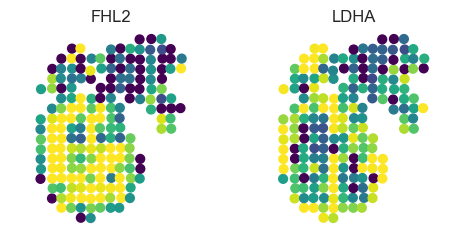

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def log_norm(dataframe):
    array = dataframe.values
    size_factor = np.sum(array, axis=0).reshape(1, -1) + 1e-7
    log_array = np.log(10000*array/size_factor + 1)
    return pd.DataFrame(log_array, columns=dataframe.keys(), index=dataframe.index)

count_mat_log_ = {}
for i in range(19):
    count_mat_log_[i] = log_norm(count_mat_all_[i])
    
size = [100]*4 + [40]*2 + [40]*2 + [30] + [40]*2 + [30]*2 + [20]*6
for k in [4]:
    # x,y = get_position(count_mat_[k].keys().tolist())
    x = meta_data_[k]['new_x']
    y = meta_data_[k]['new_y']
    print(sample_list[k])
    
    fig = plt.figure(figsize=(12, 12), dpi=100)
    i = 0
    for g in gene_roi:
        g = g.upper()
        i += 1
        ax = fig.add_subplot(4, 4, i)
        plt.axis("equal")
        plt.axis('off')
        plt.title(g)
        plt.scatter(x, y, s=size[k],
                    marker = 'o',
    #                 c=np.log(10*(ours[g] - np.min(ours[g]))/(np.max(ours[g]) - np.min(ours[g]))+1),
                    c=count_mat_log_[k].loc[g],
                    cmap='viridis',
                    vmax=2
                    )
        print(np.max(count_mat_log_[k].loc[g]))
    plt.savefig(f'../paper/NNfig/Fig3/human_heart_{sample_list[k]}_2.pdf')
    plt.show()

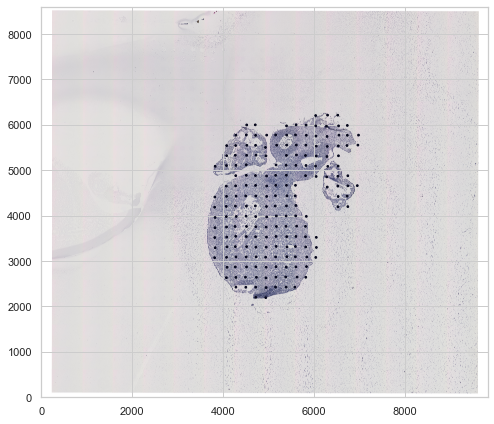

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

x = meta_data_[4]['new_x']
y = meta_data_[4]['new_y']

cm2 = plt.cm.get_cmap('tab10')

scale =222
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

img = mpimg.imread('F:/Data/dgnysc3zn5-1/ST_Samples_6.5PCW/ST_Sample_6.5PCW_4/ST_Sample_6.5PCW_4_HE_small.jpg')
ax.imshow(img)

# 生成散点图数据
x_ = np.array(x) * 222 + 1405.38
y_ = np.array(y) * scale + 216.1

ax.scatter(x_, y_,s=3, c=[1]*len(x))
ax.invert_yaxis()
plt.savefig(f'../paper/NNfig/Fig3/human_heart.png')
plt.show()

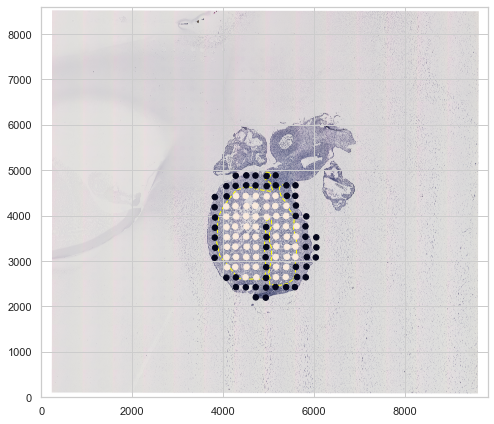

In [43]:
filtered_df = pd.read_csv(f'../paper/NNfig/Fig3/filtered_human_heart_label_layer.csv',index_col=0)
x_filt = filtered_df['pix_x']
y_filt = filtered_df['pix_y']
label_filt = filtered_df['label']
cm2 = plt.cm.get_cmap('tab10')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

img = mpimg.imread('F:/Data/dgnysc3zn5-1/ST_Samples_6.5PCW/ST_Sample_6.5PCW_4/ST_Sample_6.5PCW_4_HE_small_labeled.jpg')
ax.imshow(img)

ax.scatter(x_filt, y_filt,s=30, c=label_filt)
ax.invert_yaxis()
plt.savefig(f'../paper/NNfig/Fig3/human_heart_filtered.pdf')
plt.show()

In [44]:
gene_filt = count_mat_log_[4][filtered_df.index]

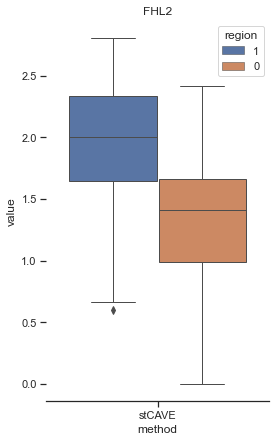

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

gene_filt_1 = gene_filt.loc['FHL2']
df_exp = {
    'value':gene_filt_1,
    'method': ['stCAVE'] * len(gene_filt_1),
    'region': filtered_df['label'],
}
df_exp = pd.DataFrame(df_exp)
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(4, 7))
plt.title('FHL2')
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
# sns.boxplot(data=df_exp, x="method", y="value", hue="region",
#             whis=[0, 100], linewidth=1)
sns.boxplot(data=df_exp, x="method", y="value", hue="region",
        linewidth=1, hue_order=[1, 0])
sns.despine(left=True)
plt.savefig(f'../paper/NNfig/Fig3/human_inner_outer_FHL2.pdf')
plt.show()

In [46]:
from scipy import stats

def get_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    elif p_value < 0.1:
        return "."
    else:
        return "n.s."

exp_0 = gene_filt_1
in_ = []
out_ = []
for i in range(len(filtered_df['label'])):
    l = filtered_df['label'][i]
    if l == 1:
        in_.append(exp_0[i])
    else:
        out_.append(exp_0[i])

for i in range(2):
    # 两组数据
    group1 = in_
    group2 = out_

    # 计算 t 值和 P 值
    t, p = stats.ranksums(group1, group2)

    # 输出 P 值
    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

-log P-value: 5.946733274503755
star: ***
-log P-value: 5.946733274503755
star: ***


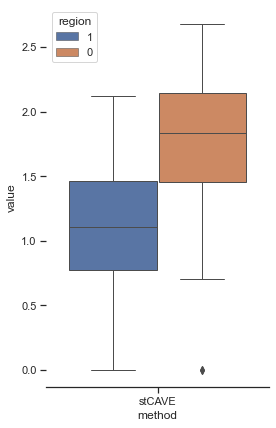

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

gene_filt_2 = gene_filt.loc['LDHA']
df_exp = {
    'value':gene_filt_2,
    'method': ['stCAVE'] * len(gene_filt_2),
    'region': filtered_df['label'],
}
df_exp = pd.DataFrame(df_exp)
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(4, 7))
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
# sns.boxplot(data=df_exp, x="method", y="value", hue="region",
#             whis=[0, 100], linewidth=1)
sns.boxplot(data=df_exp, x="method", y="value", hue="region",
        linewidth=1, hue_order=[1, 0])
sns.despine(left=True)
plt.savefig(f'../paper/NNfig/Fig3/human_inner_outer_LDHA.pdf')
plt.show()

In [48]:
exp_0 = gene_filt_2
in_ = []
out_ = []
for i in range(len(filtered_df['label'])):
    l = filtered_df['label'][i]
    if l == 1:
        in_.append(exp_0[i])
    else:
        out_.append(exp_0[i])

for i in range(2):
    # 两组数据
    group1 = in_
    group2 = out_

    # 计算 t 值和 P 值
    t, p = stats.ranksums(group1, group2)

    # 输出 P 值
    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

-log P-value: 7.186773112321926
star: ***
-log P-value: 7.186773112321926
star: ***


# Supp Fig 5 | Spatial visualization of peak intensities before and after soScope enhancement.

In [19]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd


project_name = 'Peak_60_SR'
exp_name = 'svae_peak_nn1_n'

pro_name = pd.read_csv(f'result/{project_name}/marker_peaks.csv')['name'].tolist()

folder_name = f'result/{project_name}/{exp_name}'
fea = np.load(f'{folder_name}/infer_subspot.npy')

print(fea.shape)

grid = 4
spot_num = fea.shape[0]//grid
mean_fea = np.zeros((spot_num, fea.shape[1]))
for i in range(spot_num):
    sub_fea = fea[i*grid:(i+1)*grid, :]
    mean_fea[i] = np.mean(sub_fea, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_count.npy', fea)

df = pd.DataFrame(fea, columns=pro_name)
df.to_csv(f'result/{project_name}/{exp_name}_count.csv', index=None)

np.save(f'result/{project_name}/{exp_name}_mean.npy', mean_fea)
pd.DataFrame(mean_fea, columns=pro_name).to_csv(f'result/{project_name}/{exp_name}_mean.csv', index=None)





# genes_roi = [2, 22, 44, 52]


(7896, 60)


chr17:14400000-14404999
chr18:67465000-67469999
chr17:14380000-14384999
chr1:12945000-12949999
chr14:48315000-48319999
chr18:32385000-32389999
chr9:47395000-47399999
chr9:47410000-47414999


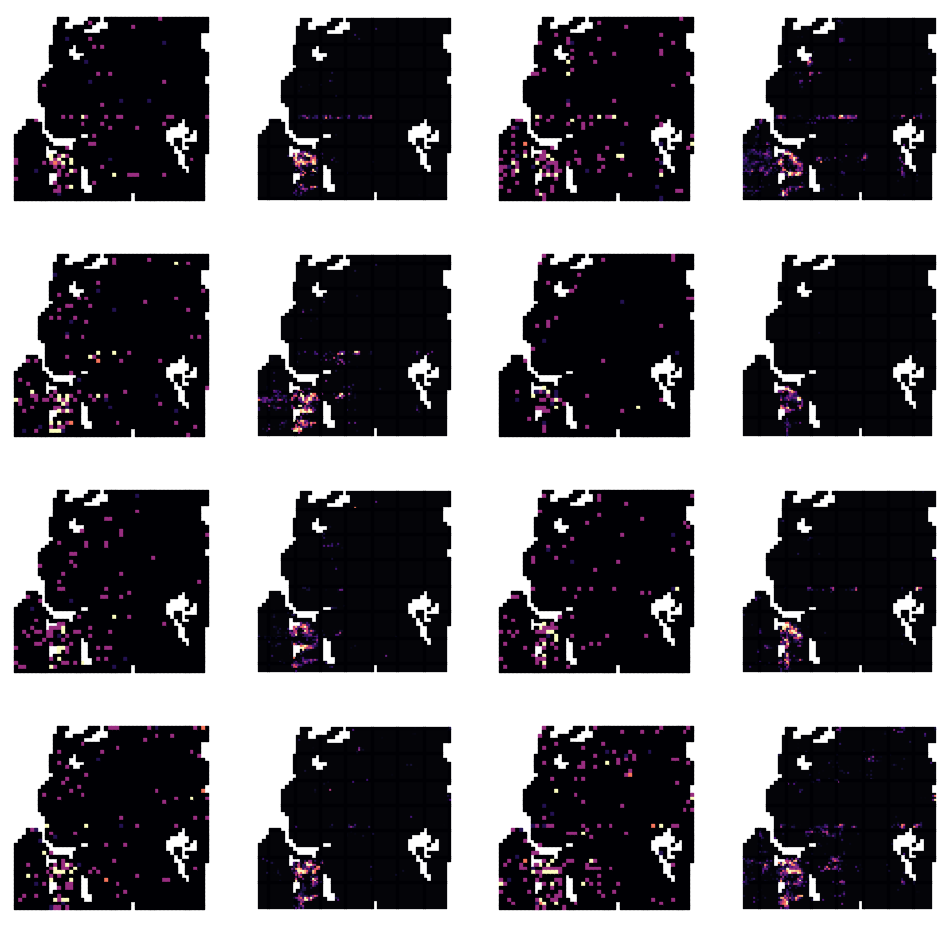

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


cmap='magma'

ours = pd.read_csv(f'result/{project_name}/{exp_name}_count.csv')
en_position = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')
row_ = en_position['row'].tolist()
col_ = en_position['col'].tolist()

true_feature = pd.read_csv(f'result/{project_name}/reordered_marker_peak.csv', index_col=0)
position = pd.read_csv(f'result/{project_name}/filtered_position_4.csv')
row = position['row'].tolist()
col = position['col'].tolist()

genes = true_feature.keys().tolist()
size = 1
fig = plt.figure(figsize=(12, 12), dpi=100)
i = 0
for k in [0,1,3,4,5,6,7,8]:
    g = genes[k]
    print(pro_name[k])
    ax = fig.add_subplot(4, 4, 2*i+1)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col), -1*np.array(row), s=5,
                marker = 's',
                vmin=0.5,
                c=true_feature[g],
                cmap=cmap)
    ax = fig.add_subplot(4, 4, 2*i+2)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col_), -1*np.array(row_), s=0.6,
            marker ='s',
            c=ours[g], vmin=0.5, vmax=np.max(true_feature[g]),
            cmap=cmap
            )
    i += 1
plt.savefig(f'../paper/NNfig/Fig3/supp/peak_compare_1.png')
plt.show()

chr11:120185000-120189999
chr2:18045000-18049999
chr5:142815000-142819999
chr5:142810000-142814999
chr17:29465000-29469999
chr5:142820000-142824999
chr18:47365000-47369999
chr14:54910000-54914999


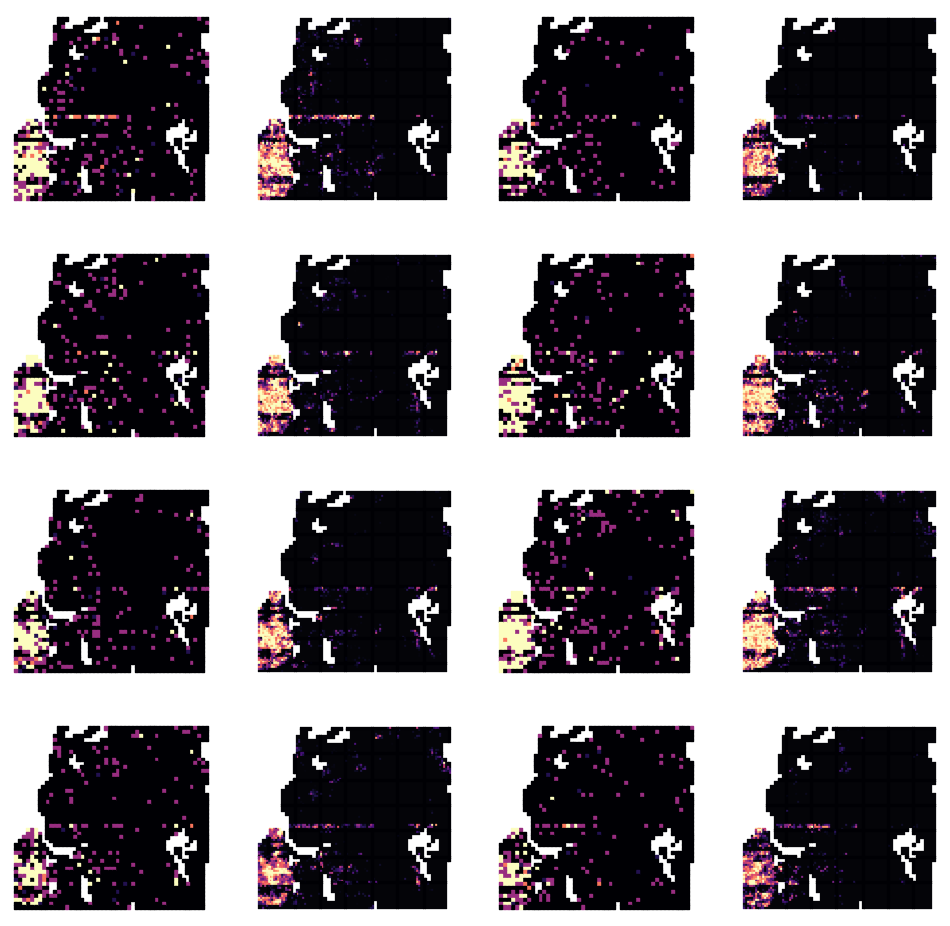

In [23]:

cmap='magma'
fig = plt.figure(figsize=(12, 12), dpi=100)
i = 0
for k in [15,16,17,18,19,20,21,23]:
    g = genes[k]
    print(pro_name[k])
    ax = fig.add_subplot(4, 4, 2*i+1)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col), -1*np.array(row), s=5,
                marker = 's',
                vmin=0.5,
                c=true_feature[g],
                cmap=cmap)
    ax = fig.add_subplot(4, 4, 2*i+2)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col_), -1*np.array(row_), s=0.6,
            marker ='s',
            c=ours[g], vmin=0.5, vmax=np.max(true_feature[g]),
            cmap=cmap
            )
    i += 1
plt.savefig(f'../paper/NNfig/Fig3/supp/peak_compare_2.png')
plt.show()

chr14:46635000-46639999
chr5:116315000-116319999
chr2:60795000-60799999
chr2:60880000-60884999
chr7:131770000-131774999
chr18:66020000-66024999
chr1:89745000-89749999
chr7:131775000-131779999


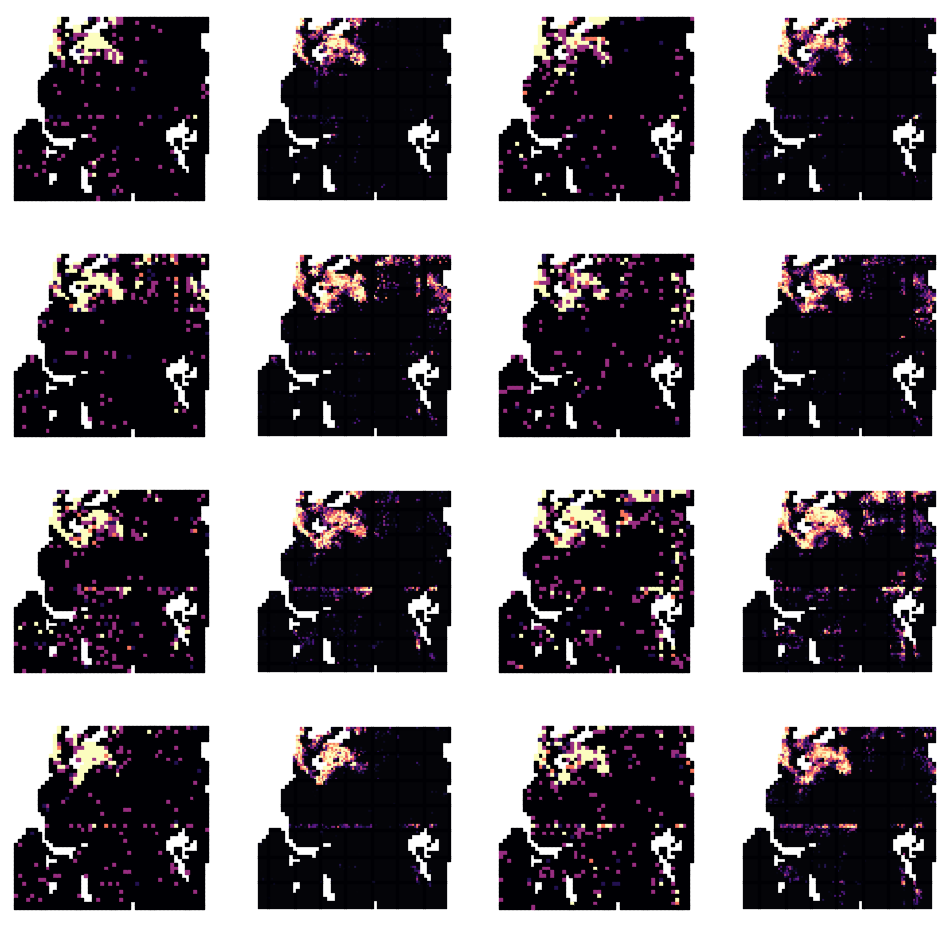

In [24]:
cmap='magma'
size = 1
fig = plt.figure(figsize=(12, 12), dpi=100)
i = 0
for k in [30,31,32,33,34,35,36,37]:
    g = genes[k]
    print(pro_name[k])
    ax = fig.add_subplot(4, 4, 2*i+1)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col), -1*np.array(row), s=5,
                marker = 's',
                vmin=0.5,
                c=true_feature[g],
                cmap=cmap)
    ax = fig.add_subplot(4, 4, 2*i+2)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col_), -1*np.array(row_), s=0.6,
            marker ='s',
            c=ours[g], vmin=0.5, vmax=np.max(true_feature[g]),
            cmap=cmap
            )
    i += 1
plt.savefig(f'../paper/NNfig/Fig3/supp/peak_compare_3.png')
plt.show()

chr16:29710000-29714999
chr5:101125000-101129999
chr16:29715000-29719999
chr4:117395000-117399999
chr5:101510000-101514999
chr16:91160000-91164999
chr16:29720000-29724999
chr4:117415000-117419999


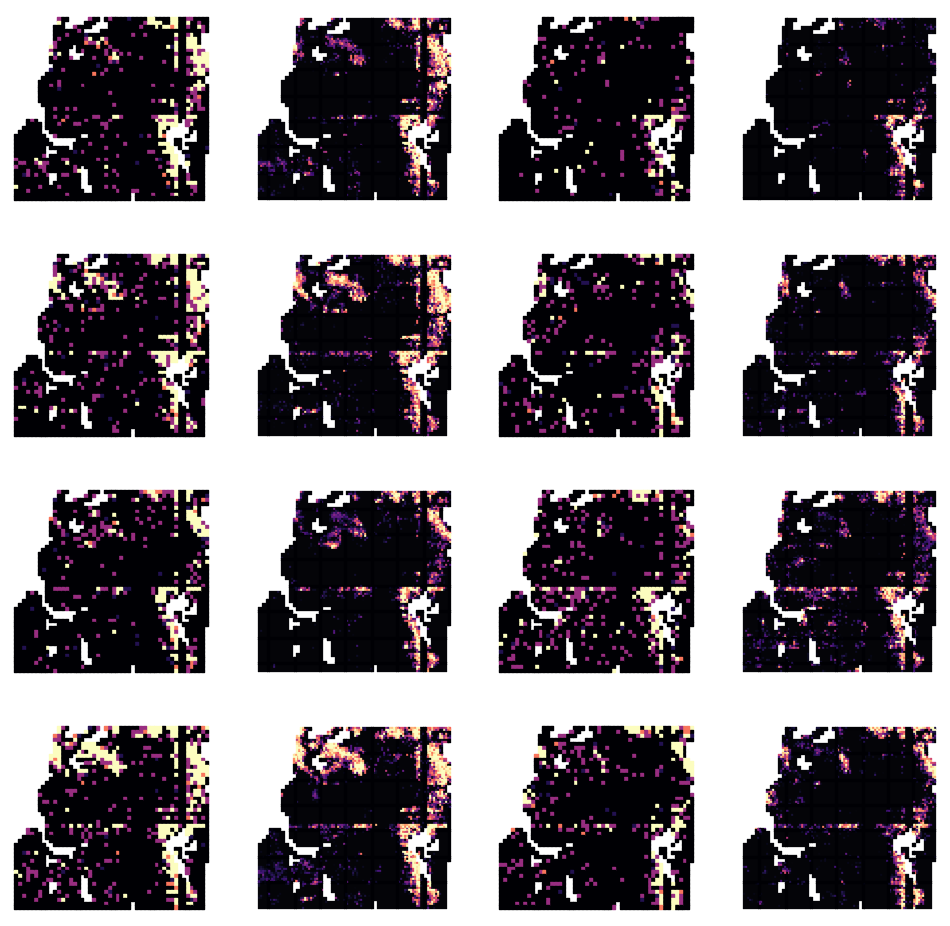

In [25]:
cmap='magma'
size = 1
fig = plt.figure(figsize=(12, 12), dpi=100)
i = 0
for k in [45,46,47,48,49,50,51,53]:
    g = genes[k]
    print(pro_name[k])
    ax = fig.add_subplot(4, 4, 2*i+1)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col), -1*np.array(row), s=5,
                marker = 's',
                vmin=0.5,
                c=true_feature[g],
                cmap=cmap)
    ax = fig.add_subplot(4, 4, 2*i+2)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(-1*np.array(col_), -1*np.array(row_), s=0.6,
            marker ='s',
            c=ours[g], vmin=0.5, vmax=np.max(true_feature[g]),
            cmap=cmap
            )
    i += 1
plt.savefig(f'../paper/NNfig/Fig3/supp/peak_compare_4.png')
plt.show()